In [1]:
import mlxtend

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv("my_movies.csv")

In [4]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
df=pd.get_dummies(movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [6]:
frequent_itemsets=apriori(df,min_support=0.02,use_colnames=True)
frequent_itemsets.head(50)

C:\Users\91958\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [7]:
rules = association_rules(frequent_itemsets, metric='lift',min_threshold=2.0)
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Harry Potter1),(LOTR1),0.2,0.2,0.1,0.5,2.5,0.06,1.6,0.750000
1,(LOTR1),(Harry Potter1),0.2,0.2,0.1,0.5,2.5,0.06,1.6,0.750000
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.000000
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.000000
4,(LOTR1),(Green Mile),0.2,0.2,0.1,0.5,2.5,0.06,1.6,0.750000
5,(Green Mile),(LOTR1),0.2,0.2,0.1,0.5,2.5,0.06,1.6,0.750000
6,(LOTR1),(V1_LOTR1),0.2,0.1,0.1,0.5,5.0,0.08,1.8,1.000000
7,(V1_LOTR1),(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf,0.888889
8,(LOTR1),(V1_Sixth Sense),0.2,0.2,0.1,0.5,2.5,0.06,1.6,0.750000
9,(V1_Sixth Sense),(LOTR1),0.2,0.2,0.1,0.5,2.5,0.06,1.6,0.750000


In [8]:
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
61863,(V3_Harry Potter1),"(Harry Potter1, V5_LOTR2, LOTR1, LOTR2, Green ...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.000000
33312,"(LOTR1, Green Mile, Sixth Sense, V2_LOTR1, V3_...","(LOTR2, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.000000
33287,"(V2_LOTR1, V3_Harry Potter1)","(Harry Potter1, V5_LOTR2, LOTR1, Sixth Sense, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.000000
52181,"(Harry Potter1, V5_LOTR2)","(Green Mile, LOTR2, Sixth Sense, V1_Sixth Sens...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.000000
33289,(V5_LOTR2),"(Harry Potter1, LOTR1, Sixth Sense, V4_Green M...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
28934,"(Sixth Sense, Gladiator)","(Green Mile, V2_LOTR, V3_Gladiator, V1_Sixth S...",0.5,0.1,0.1,0.2,2.0,0.05,1.125,1.000000
1183,"(V3_Gladiator, V1_Sixth Sense)","(Sixth Sense, Gladiator)",0.1,0.5,0.1,1.0,2.0,0.05,inf,0.555556
14220,"(Sixth Sense, Gladiator)","(LOTR, V2_LOTR, V4_Green Mile, V1_Sixth Sense)",0.5,0.1,0.1,0.2,2.0,0.05,1.125,1.000000
1196,"(Sixth Sense, Gladiator)","(V2_LOTR, V3_Gladiator)",0.5,0.1,0.1,0.2,2.0,0.05,1.125,1.000000


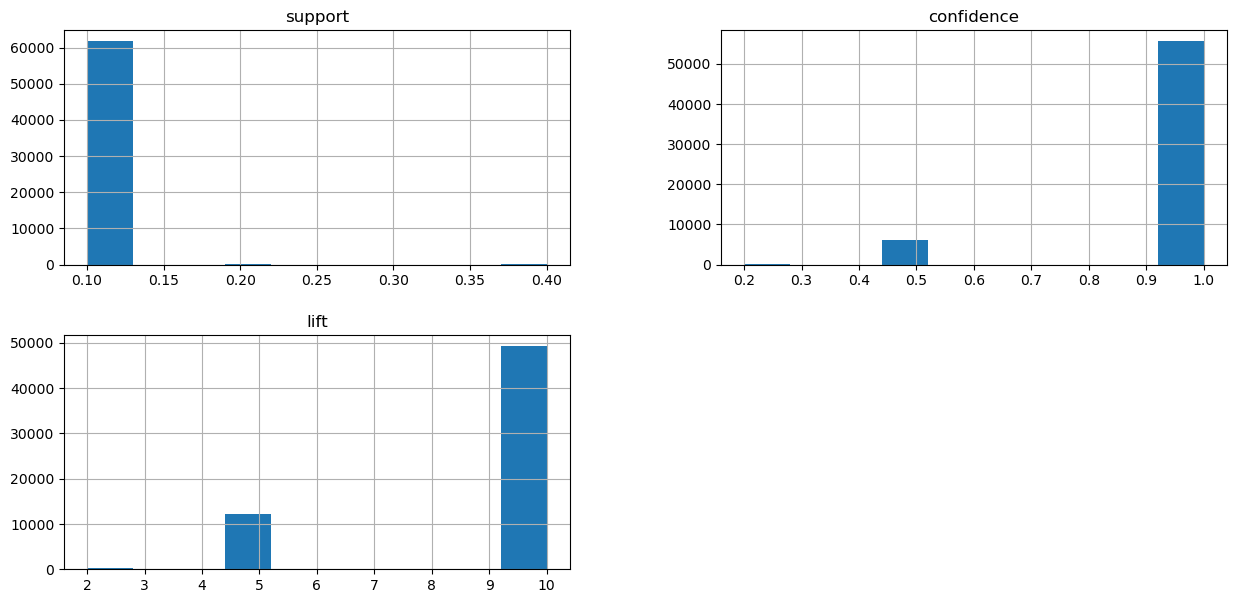

In [9]:
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

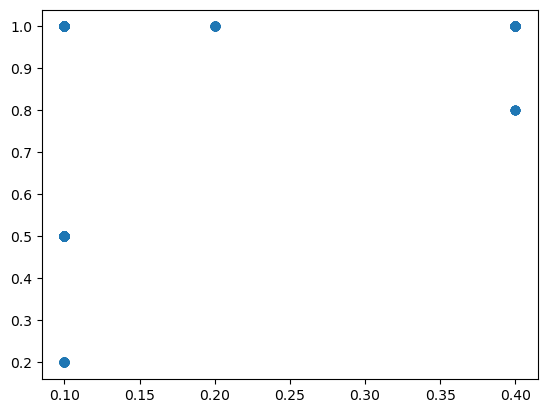

In [10]:
plt.scatter(rules['support'],rules['confidence'])
plt.show()

In [ ]:
# INSIGHTS 
# V3_Harry Potter1 , Harry Potter1, V5_LOTR2, LOTR1, LOTR2, Green Mile have the highest Association followed by the rest 